### Generator sizing example (stochastic)

Victor Z and David Cole

UW-Madison, 2022

In [1]:
# Victor Z and David Cole
# UW-Madison, 2024
# Generator sizing example (stochastic solution)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from statsmodels.distributions.empirical_distribution import ECDF

# Function Definitions

def myfun(u, X):
    R = np.maximum(X - u, 0)
    return 5 * (R**2) + 15 * u**2

# Generate scenarios for random load
np.random.seed(0)
N = 1000
X = weibull_min.rvs(2, scale=10, size=N)

# Find deterministic solution
u = np.arange(0, 11, 2)
x = np.max(X)

yd = [myfun(uk, x) for uk in u]

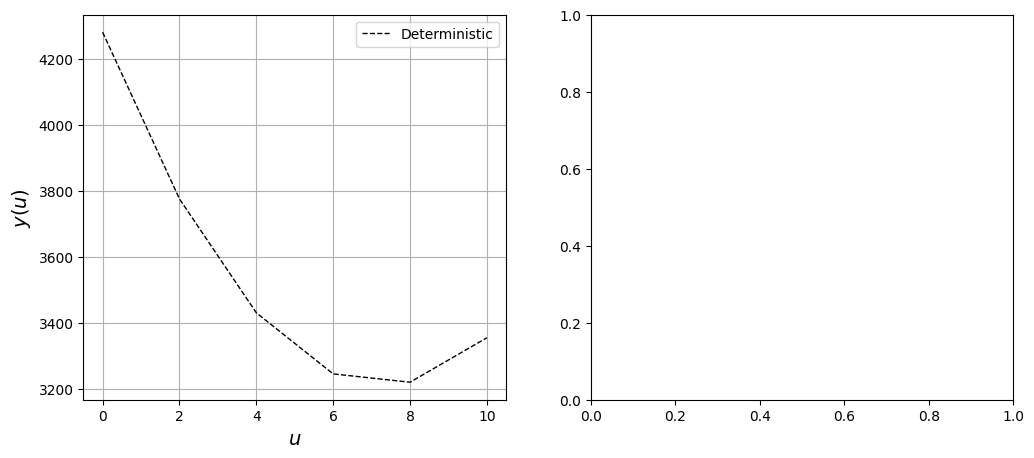

In [3]:
# Visualize deterministic objective against decision
fig2, axs2 = plt.subplots(1, 2, figsize=(12, 5))

axs2[0].plot(u, yd, linewidth=1, color='black', linestyle='--')
axs2[0].grid(True)
axs2[0].set_xlabel('$u$', fontsize=14)
axs2[0].set_ylabel('$y(u)$', fontsize=14)
axs2[0].legend(['Deterministic'])

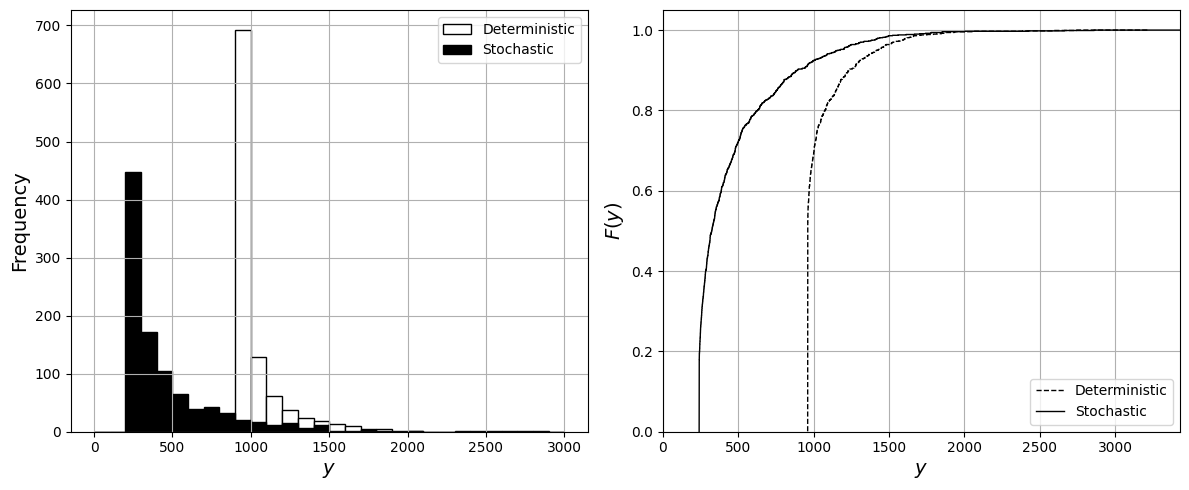

In [4]:
# Find optimal size that
idx = np.argmin(yd)
ud = u[idx]

# Evaluate how the deterministic solution ud behaves when it confronts uncertainty
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 5))
yd = myfun(ud, X)

ecdf_yd = ECDF(yd)

axs1[1].grid(True)
axs1[1].step(ecdf_yd.x, ecdf_yd.y, linewidth=1, color='black', linestyle='--')

axs1[0].grid(True)
axs1[0].hist(yd, bins=np.arange(0, 3100, 100), edgecolor='black', facecolor='white', linewidth=1)

# Mean
Ed = np.mean(yd)

# Find stochastic solution
Ey, Vy, MVy, Qy, CVaRy, maxy, Prob = [], [], [], [], [], [], []

for uk in u:
    y = myfun(uk, X)

    # Mean
    Ey.append(np.mean(y))

    # Std dev
    Vy.append(np.sqrt(np.var(y)))

    # Mean-sd
    MVy.append(Ey[-1] + Vy[-1])

    # VaR (quantile)
    Qy.append(np.quantile(y, 0.9))

    # CVaR
    loc = y >= Qy[-1]
    CVaRy.append(np.mean(y[loc]))

    # Worst-case
    maxy.append(np.max(y))

    # Probability of loss
    loc = y > 2000
    Prob.append(100 * np.sum(loc) / N)

# Select risk measure to optimize
rm = CVaRy

# Find solution that minimizes risk
idx = np.argmin(rm)
us = u[idx]

# Evaluate how stochastic solution behaves when it confronts uncertainty
ys = myfun(us, X)

# Mean
Es = np.mean(ys)

ecdf_ys = ECDF(ys)

axs1[1].grid(True)
axs1[1].step(ecdf_ys.x, ecdf_ys.y, linewidth=1, color='black', linestyle='-')
axs1[1].set_xlim([0, np.max(ys)])
axs1[1].set_ylim([0, 1.05])
axs1[1].set_xlabel('$y$', fontsize=14)
axs1[1].set_ylabel('$F(y)$', fontsize=14)
axs1[1].legend(['Deterministic', 'Stochastic'], loc='lower right')

axs1[0].grid(True)
axs1[0].hist(ys, bins=np.arange(0, 3100, 100), edgecolor='black', facecolor='black', linewidth=1)
axs1[0].legend(['Deterministic', 'Stochastic'])
axs1[0].set_xlabel('$y$', fontsize=14)
axs1[0].set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

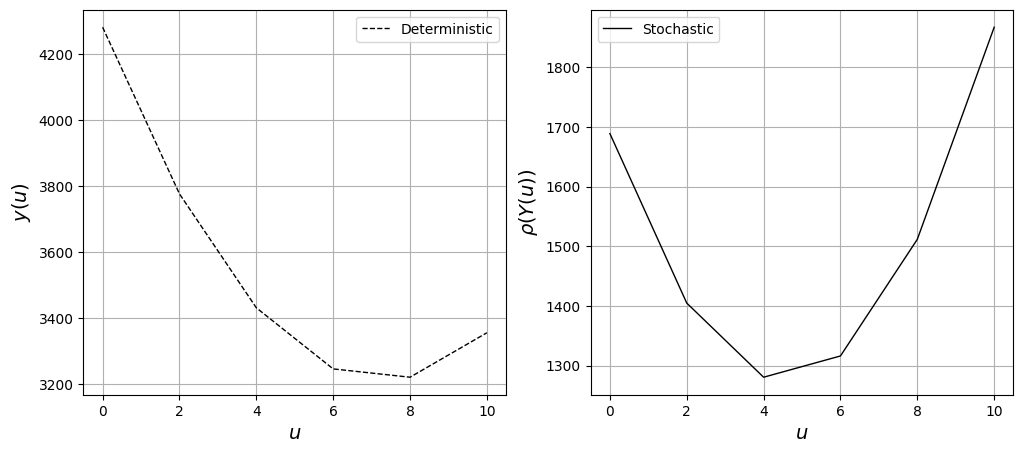

<Figure size 640x480 with 0 Axes>

In [5]:
# Visualize risk measure against decision
axs2[1].grid(True)
axs2[1].plot(u, rm, linewidth=1, color='black', linestyle='-')
axs2[1].set_xlabel('$u$', fontsize=14)
axs2[1].set_ylabel('$ρ(Y(u))$', fontsize=14)
axs2[1].legend(['Stochastic'], loc='upper left')

plt.tight_layout()
fig2